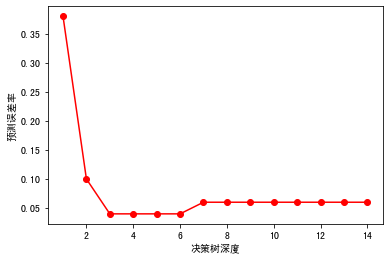

In [20]:
#项目6-例6-4代码
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#提取特征，划分数据集
x,y=load_iris().data[:,2:4],load_iris().target    #提取花瓣长度与花瓣宽度作为特征，训练模型
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0,test_size=50) #将数据集拆分为训练集与测试集

#决策树深度与模型预测误差率计算
depth=np.arange(1,15)
err_list=[]
for i in depth:
    model=DecisionTreeClassifier(criterion='entropy',max_depth=i)
    model.fit(x_train,y_train)
    pred=model.predict(x_test)
    ac=accuracy_score(y_test,pred)
    err=1-ac
    err_list.append(err)
    
#绘制决策树深度与模型预测误差率图形
plt.plot(depth,err_list,'ro-')
plt.rcParams['font.sans-serif']='Simhei'
plt.xlabel('决策树深度')
plt.ylabel('预测误差率')
plt.show()

In [21]:
#当深度=3时，建立决策树模型
model=DecisionTreeClassifier(criterion='entropy',max_depth=3)
model.fit(x_train,y_train)
#模型评估
pred=model.predict(x_test)
ac=accuracy_score(y_test,pred)
print('模型的预测准确率为：',ac)

模型的预测准确率为： 0.96


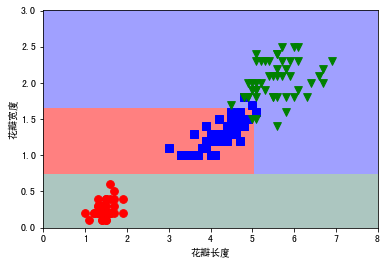

In [22]:
#绘制可视化图形，显示分类结果
from matplotlib.colors import ListedColormap

#绘制分类界面
N,M=500,500                  #网格采样点的个数，采样点越多，分类界面图越精细
t1=np.linspace(0,8,N)        #生成采样点的横坐标值
t2=np.linspace(0,3,M)        #生成采样点的纵坐标值
x1,x2=np.meshgrid(t1,t2)     #生成网格采样点
x_new=np.stack((x1.flat,x2.flat),axis=1)  #将采样点作为测试点
y_predict=model.predict(x_new)  #预测测试点的值
y_hat=y_predict.reshape(x1.shape) #与x1设置相同的形状
iris_cmap=ListedColormap(["#ACC6C0","#FF8080","#A0A0FF"])                   #设置分类界面的颜色
plt.pcolormesh(x1,x2,y_hat,cmap=iris_cmap)                                    #绘制分类界面

#绘制3种类别鸢尾花的样本点
plt.scatter(x[y==0,0],x[y==0,1],c='r',s=60,marker='o')	#绘制标签为0的样本点
plt.scatter(x[y==1,0],x[y==1,1],c='b',s=60,marker='s')	#绘制标签为1的样本点
plt.scatter(x[y==2,0],x[y==2,1],c='g',s=60,marker='v')	#绘制标签为2的样本点

#设置坐标轴的名称并显示图形
plt.rcParams['font.sans-serif']='Simhei'
plt.xlabel('花瓣长度')
plt.ylabel('花瓣宽度')
plt.show()